In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
data=pd.read_csv("bestsellers with categories.csv")

In [174]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [175]:
r,c=data.shape
print(f"the data has {r} rows and {c} columns")

the data has 550 rows and 7 columns


In [176]:
data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [178]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [179]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [180]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [181]:
data.isnull().sum(axis=1).sort_values(ascending=False).sum()

0

In [182]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546    False
547    False
548    False
549    False
Length: 550, dtype: bool

In [183]:
data[data.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


In [184]:
len(data[data.duplicated()])

0

In [185]:
len(data.Name.unique())

351

In [186]:
data[['Name','Author']].duplicated().sum()

199

In [187]:
data['Profit']=data['Reviews']*data["Price"]

In [188]:
top10=data.sort_values(by="Profit",ascending=False).head(10)

In [189]:
top10

,Name,Author,User Rating,Reviews,Price,Year,Genre,Profit
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,1430028
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction,1396161
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,1317615
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction,701295
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction,701295
159,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,2016,Fiction,700492
393,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2014,Fiction,676880
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20,2013,Fiction,676880
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,672463
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,672463


In [190]:
top10=data.groupby("Name")[['Profit']].max().sort_values(by='Profit',ascending=False).head(10)

In [191]:
top10

,Profit
Name,
The Girl on the Train,1430028
The Alchemist,1396161
Where the Crawdads Sing,1317615
"Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5",701295
Harry Potter Paperback Box Set (Books 1-7),700492
The Goldfinch: A Novel (Pulitzer Prize for Fiction),676880
Becoming,672463
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series),661710
The Fault in Our Stars,656266


Text(0.5, 1.0, 'earning by book')

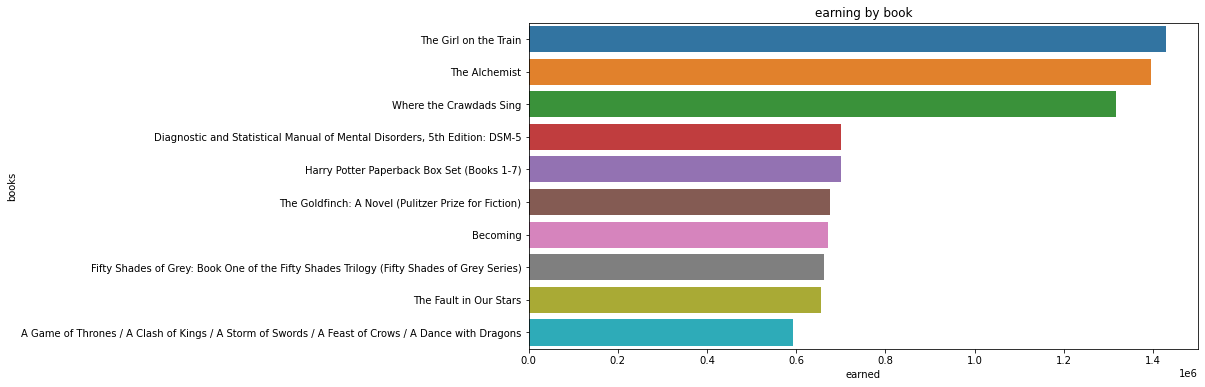

In [192]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10.Profit,y=top10.index.values)
plt.xlabel('earned')
plt.ylabel('books')
plt.title("earning by book")

In [193]:
data.Genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [194]:
data.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

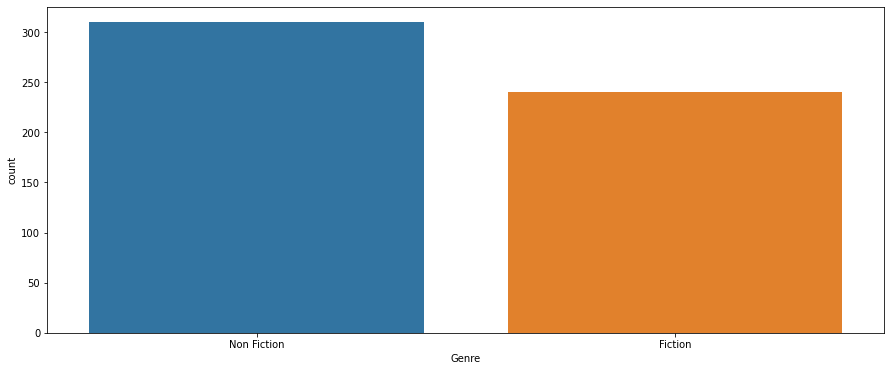

In [195]:
plt.figure(figsize=(15,6))
sns.countplot(x="Genre",data=data)
plt.show()

([<matplotlib.patches.Wedge at 0x243e8efb460>,
 [Text(-0.218449509639842, 1.078090817945368, 'Non Fiction'),
  Text(0.2184495096398414, -1.0780908179453683, 'Fiction')],
 [Text(-0.11915427798536835, 0.5880495370611099, '56%'),
  Text(0.11915427798536801, -0.5880495370611099, '44%')])

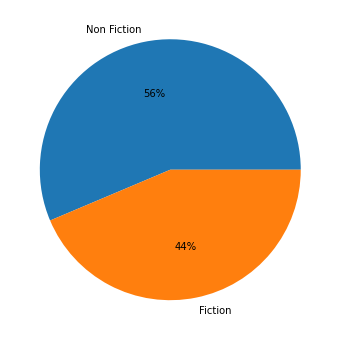

In [196]:
plt.figure(figsize=(15,6))
plt.pie(data.Genre.value_counts(),labels=['Non Fiction', 'Fiction'],autopct='%.0f%%')

In [197]:
data.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

Text(0.5, 0, 'Rating')

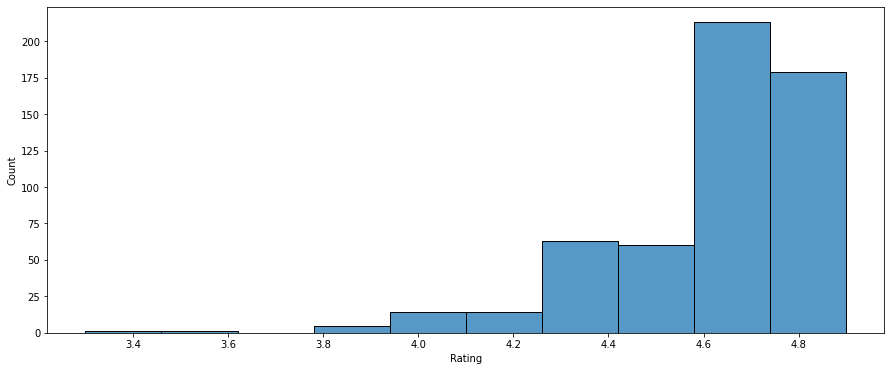

In [198]:
plt.figure(figsize=(15,6))
sns.histplot(data=data['User Rating'],bins=10)
plt.xlabel('Rating')

<AxesSubplot:xlabel='Year', ylabel='User Rating'>

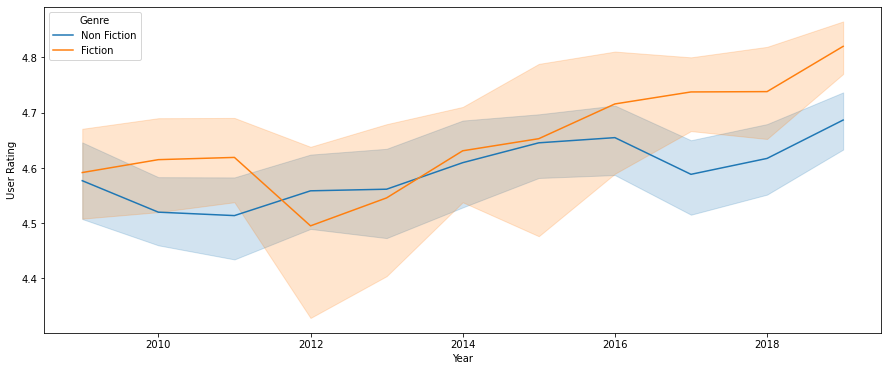

In [199]:
plt.figure(figsize=(15,6))
sns.lineplot(y=data['User Rating'],
            x=data['Year'],
            hue=data['Genre'])

Text(20.80000000000001, 0.5, 'Price')

<Figure size 1080x432 with 0 Axes>

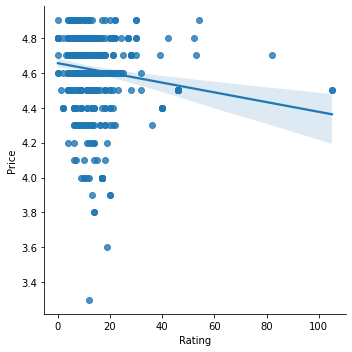

In [200]:
plt.figure(figsize=(15,6))
sns.lmplot(y='User Rating',
          x='Price',
          data=data)
plt.xlabel("Rating")
plt.ylabel("Price")

In [201]:
data.groupby('Genre')['User Rating'].mean()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

In [202]:
data.groupby('Year').Profit.sum().sort_values(ascending=False)

Year
2014    10625500
2012     8929419
2019     8336955
2013     8321579
2016     7951530
2015     7745165
2018     7183575
2017     6669195
2011     5548689
2010     3620509
2009     3567282
Name: Profit, dtype: int64

<AxesSubplot:xlabel='Year'>

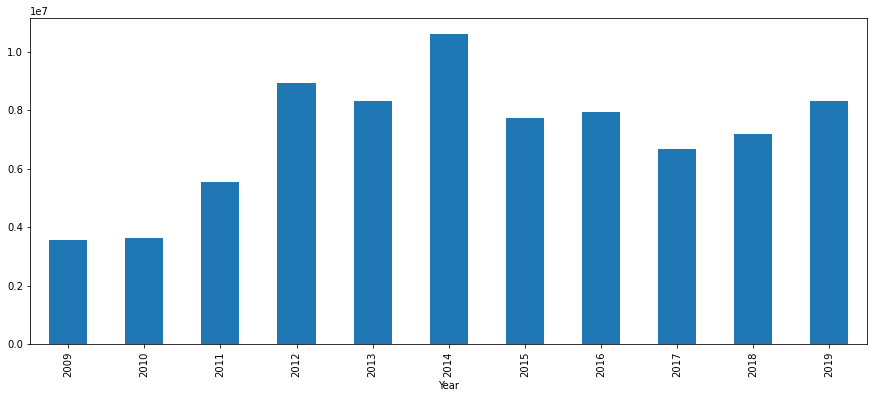

In [203]:
plt.figure(figsize=(15,6))
data.groupby('Year').Profit.sum().plot(kind='bar')

In [204]:
data.groupby(['Year','Genre']).Profit.sum().sort_values(ascending=False)

Year  Genre      
2014  Fiction        6858148
2013  Fiction        5444489
2012  Fiction        5098394
2018  Non Fiction    4713219
2019  Non Fiction    4500705
2015  Fiction        4364798
2016  Fiction        4064705
      Non Fiction    3886825
2019  Fiction        3836250
2012  Non Fiction    3831025
2014  Non Fiction    3767352
2017  Non Fiction    3568679
2015  Non Fiction    3380367
2017  Fiction        3100516
2011  Non Fiction    3082561
2013  Non Fiction    2877090
2018  Fiction        2470356
2011  Fiction        2466128
2009  Fiction        2058643
2010  Non Fiction    1930069
      Fiction        1690440
2009  Non Fiction    1508639
Name: Profit, dtype: int64

Text(0.5, 1.0, 'mpney earned each year')

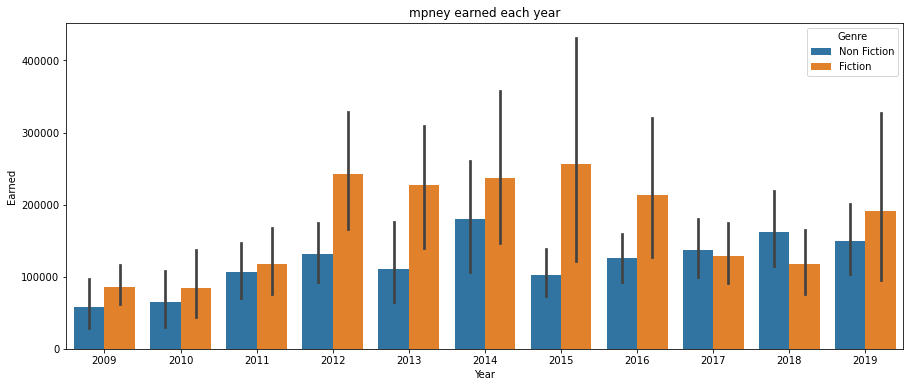

In [205]:
plt.figure(figsize=(15,6))
sns.barplot(
            x=data['Year'],
            y=data['Profit'],
            hue=data['Genre'])
plt.xlabel("Year")
plt.ylabel("Earned")
plt.title("mpney earned each year")

In [206]:
genre_avarage=data.groupby(['Genre'])['Profit'].mean()

In [207]:
genre_avarage

Genre
Fiction        172720.279167
Non Fiction    119504.938710
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Genre', ylabel='Profit'>

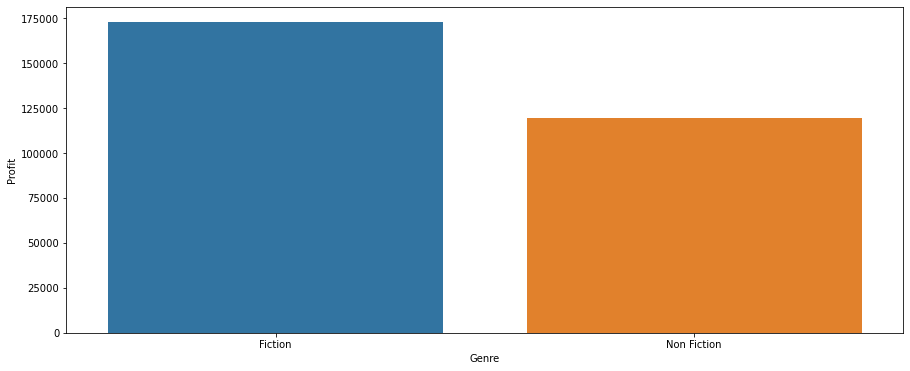

In [208]:
plt.figure(figsize=(15,6))
sns.barplot(x= genre_avarage.index,

            y=genre_avarage)

In [209]:
data.groupby('Year')['Profit'].max().sort_values(ascending=False)

Year
2015    1430028
2014    1396161
2019    1317615
2013     701295
2016     700492
2018     672463
2012     661710
2011     508470
2010     474768
2017     458730
2009     394680
Name: Profit, dtype: int64

In [210]:
data.groupby('Year')['Profit'].transform(max)

0       700492
1       508470
2       672463
3       458730
4      1317615
        ...   
545    1317615
546     700492
547     458730
548     672463
549    1317615
Name: Profit, Length: 550, dtype: int64

In [211]:
most_earning_books_per_year=data[data.groupby('Year')['Profit'].transform(max)==data['Profit']]

In [212]:
most_earning_books_per_year.sort_values('Year').set_index('Year')

,Name,Author,User Rating,Reviews,Price,Genre,Profit
Year,,,,,,,
2009,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,Non Fiction,394680
2010,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,Non Fiction,474768
2011,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,Fiction,508470
2012,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,Fiction,661710
2013,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,Non Fiction,701295
2014,The Alchemist,Paulo Coelho,4.7,35799,39,Fiction,1396161
2015,The Girl on the Train,Paula Hawkins,4.1,79446,18,Fiction,1430028
2016,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52,Fiction,700492
2017,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,Fiction,458730


In [213]:
genre_per_year_mean=data.groupby(['Year','Genre'])['Profit'].mean().round(2)

In [214]:
genre_per_year_mean

Year  Genre      
2009  Fiction         85776.79
      Non Fiction     58024.58
2010  Fiction         84522.00
      Non Fiction     64335.63
2011  Fiction        117434.67
      Non Fiction    106295.21
2012  Fiction        242780.67
      Non Fiction    132104.31
2013  Fiction        226853.71
      Non Fiction    110657.31
2014  Fiction        236487.86
      Non Fiction    179397.71
2015  Fiction        256752.82
      Non Fiction    102435.36
2016  Fiction        213931.84
      Non Fiction    125381.45
2017  Fiction        129188.17
      Non Fiction    137256.88
2018  Fiction        117636.00
      Non Fiction    162524.79
2019  Fiction        191812.50
      Non Fiction    150023.50
Name: Profit, dtype: float64

In [215]:
earning_graph=data.groupby('Year')['Profit'].sum()

In [216]:
earning_graph

Year
2009     3567282
2010     3620509
2011     5548689
2012     8929419
2013     8321579
2014    10625500
2015     7745165
2016     7951530
2017     6669195
2018     7183575
2019     8336955
Name: Profit, dtype: int64

Text(0.5, 1.0, 'earning per year')

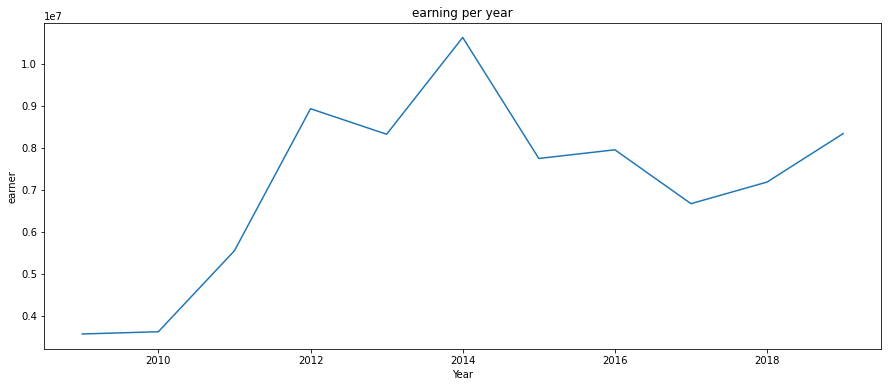

In [217]:
plt.figure(figsize=(15,6))
sns.lineplot(data=earning_graph)
plt.xlabel("Year")
plt.ylabel('earner')
plt.title('earning per year')

In [218]:
authers=data.groupby("Author")['Profit'].sum().sort_values(ascending=False).head(10)

In [219]:
authers

Author
American Psychological Association    3946800
Suzanne Collins                       3368646
E L James                             2517303
John Green                            2381609
Laura Hillenbrand                     2284821
Paula Hawkins                         1986150
Gillian Flynn                         1660859
Gary Chapman                          1516167
Dr. Seuss                             1423598
American Psychiatric Association      1402590
Name: Profit, dtype: int64

Text(0.5, 1.0, 'the money maker')

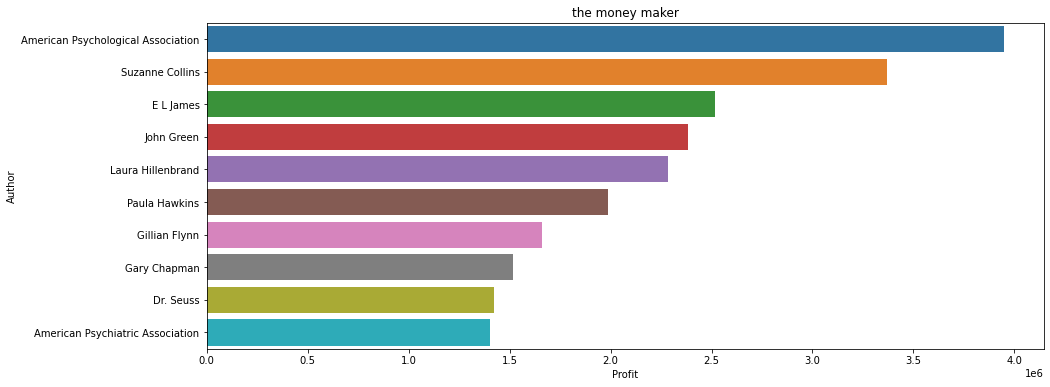

In [220]:
plt.figure(figsize=(15,6))
sns.barplot(y=authers.index,x=authers)
plt.title("the money maker")